In [14]:
import sys
import os

current_dir = os.getcwd()

project_root = os.path.dirname(current_dir)

if project_root not in sys.path:
    sys.path.append(project_root)

os.chdir(project_root)

print(f"Project Root added to path: {project_root}")
print(f"Current Working Directory: {os.getcwd()}")

Project Root added to path: /home/aaronwilly/Documents/coding
Current Working Directory: /home/aaronwilly/Documents/coding


🔄 Fetching data for BTC-USD...
✅ Data loaded successfully: 635 rows.
✅ Data validation passed.
                                  close          high           low  \
datetime                                                              
2025-12-28 00:00:00+00:00  87781.429688  87856.914062  87752.953125   
2025-12-28 00:15:00+00:00  87709.960938  87763.421875  87704.765625   
2025-12-28 00:30:00+00:00  87794.226562  87808.656250  87657.781250   
2025-12-28 00:45:00+00:00  87781.640625  87857.312500  87779.046875   
2025-12-28 01:00:00+00:00  87801.875000  87866.585938  87786.984375   

                                   open     volume  
datetime                                            
2025-12-28 00:00:00+00:00  87806.054688   37474304  
2025-12-28 00:15:00+00:00  87756.218750   21373952  
2025-12-28 00:30:00+00:00  87657.781250  515439616  
2025-12-28 00:45:00+00:00  87779.046875   44264448  
2025-12-28 01:00:00+00:00  87786.984375   21419008  


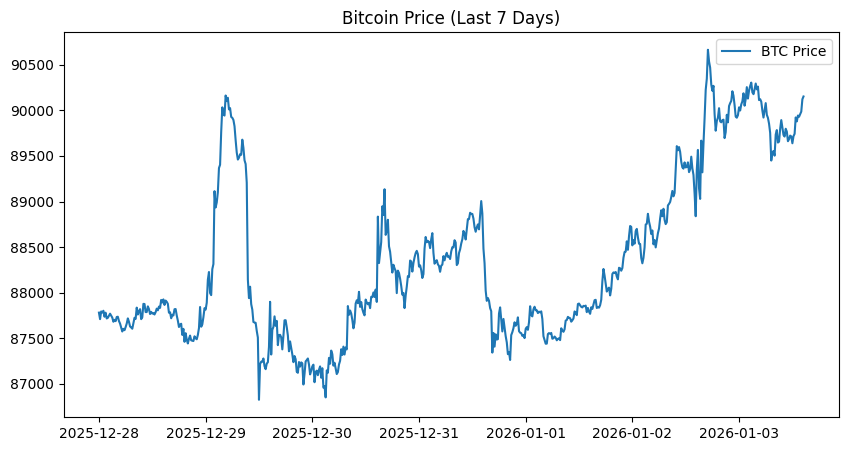

In [18]:
from src.data_pipeline import load_data, validate_data
import matplotlib.pyplot as plt

df = load_data("BTC-USD", period="7d", interval="15m")

validate_data(df)

print(df.head())

plt.figure(figsize=(10, 5))
plt.plot(df['close'], label='BTC Price')
plt.title("Bitcoin Price (Last 7 Days)")
plt.legend()
plt.show()

Features created. Data shape: (586, 11)
   Target Distribution: {1: 0.5119453924914675, 0: 0.4880546075085324}

--- New Features ---
                                  close         ma_10        rsi  target
datetime                                                                
2026-01-03 13:30:00+00:00  89929.351562  89788.939062  62.627012       1
2026-01-03 13:45:00+00:00  89956.140625  89816.154688  65.269233       1
2026-01-03 14:00:00+00:00  89985.734375  89842.488281  62.654480       1
2026-01-03 14:15:00+00:00  90121.140625  89883.265625  70.932335       1
2026-01-03 14:30:00+00:00  90151.593750  89934.557813  81.758206       0


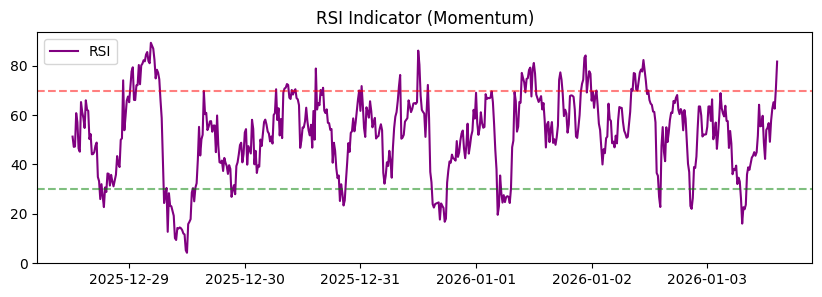

In [19]:
import importlib
import src.features

importlib.reload(src.features)

from src.features import create_features

df_processed = create_features(df)

print("\n--- New Features ---")
print(df_processed[['close', 'ma_10', 'rsi', 'target']].tail())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(df_processed.index, df_processed['rsi'], color='purple', label='RSI')
plt.axhline(70, linestyle='--', color='red', alpha=0.5)
plt.axhline(30, linestyle='--', color='green', alpha=0.5)
plt.title("RSI Indicator (Momentum)")
plt.legend()
plt.show()

In [20]:
import importlib
import src.model
importlib.reload(src.model)
from src.model import CryptoModel

features = ['ma_10', 'ma_50', 'rsi', 'volatility', 'log_return']
target = 'target'

X = df_processed[features]
y = df_processed[target]

split_point = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

print(f"Training on {len(X_train)} rows, Testing on {len(X_test)} rows.")

bot = CryptoModel(n_estimators=100, max_depth=3)
bot.train(X_train, y_train)

bot.evaluate(X_test, y_test)

save_path = '/home/aaronwilly/Documents/coding/python/trend_detection_ml/models/xgboost_v1.joblib'
bot.save(save_path)

Training on 468 rows, Testing on 118 rows.
Training XGBoost model...
Training complete.

Model Accuracy: 0.4576
Detailed Report:
              precision    recall  f1-score   support

           0       0.46      0.91      0.61        55
           1       0.44      0.06      0.11        63

    accuracy                           0.46       118
   macro avg       0.45      0.49      0.36       118
weighted avg       0.45      0.46      0.34       118

Model saved to: /home/aaronwilly/Documents/coding/python/trend_detection_ml/models/xgboost_v1.joblib
